<a href="https://colab.research.google.com/github/SARANYA787/NEW/blob/main/Face_Detection_and_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded1 = drive.CreateFile({'id':"1VGQGcdgRe0178gF67CjEd67bT8vaclol"})   # replace the id with id of file you want to access
downloaded1.GetContentFile('Group_Pic.jpeg')        # replace the file name with your file
downloaded2 = drive.CreateFile({'id':"1o8NFsSry6Kb-Zah_nblzNrhjBuA-NsOV"})
downloaded2.GetContentFile('Modi_Image.jpg')        # replace the file name with your file

In [ ]:
from matplotlib.patches import Rectangle, Circle

In [ ]:
pip install MTCNN

In [ ]:
pip install deepface

In [ ]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = "Group_Pic.jpeg"
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
  print(face)

Using TensorFlow backend.


{'box': [711, 638, 129, 169], 'confidence': 0.9999974966049194, 'keypoints': {'left_eye': (755, 703), 'right_eye': (815, 702), 'nose': (792, 731), 'mouth_left': (760, 764), 'mouth_right': (814, 765)}}
{'box': [1247, 701, 146, 187], 'confidence': 0.9999972581863403, 'keypoints': {'left_eye': (1301, 779), 'right_eye': (1363, 778), 'nose': (1338, 811), 'mouth_left': (1300, 840), 'mouth_right': (1364, 840)}}
{'box': [1355, 915, 156, 200], 'confidence': 0.9999874830245972, 'keypoints': {'left_eye': (1399, 980), 'right_eye': (1472, 981), 'nose': (1436, 1027), 'mouth_left': (1400, 1052), 'mouth_right': (1472, 1054)}}
{'box': [2500, 971, 145, 198], 'confidence': 0.9999788999557495, 'keypoints': {'left_eye': (2573, 1053), 'right_eye': (2630, 1050), 'nose': (2621, 1093), 'mouth_left': (2574, 1125), 'mouth_right': (2628, 1121)}}
{'box': [37, 696, 145, 193], 'confidence': 0.9999775886535645, 'keypoints': {'left_eye': (84, 771), 'right_eye': (148, 769), 'nose': (122, 802), 'mouth_left': (89, 838), 

In [ ]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  # plot each box
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    # draw the dots
    for key, value in result['keypoints'].items():
      # create and draw dot
      dot = Circle(value, radius=2, color='blue')
      ax.add_patch(dot)
  # show the plot
  pyplot.show()

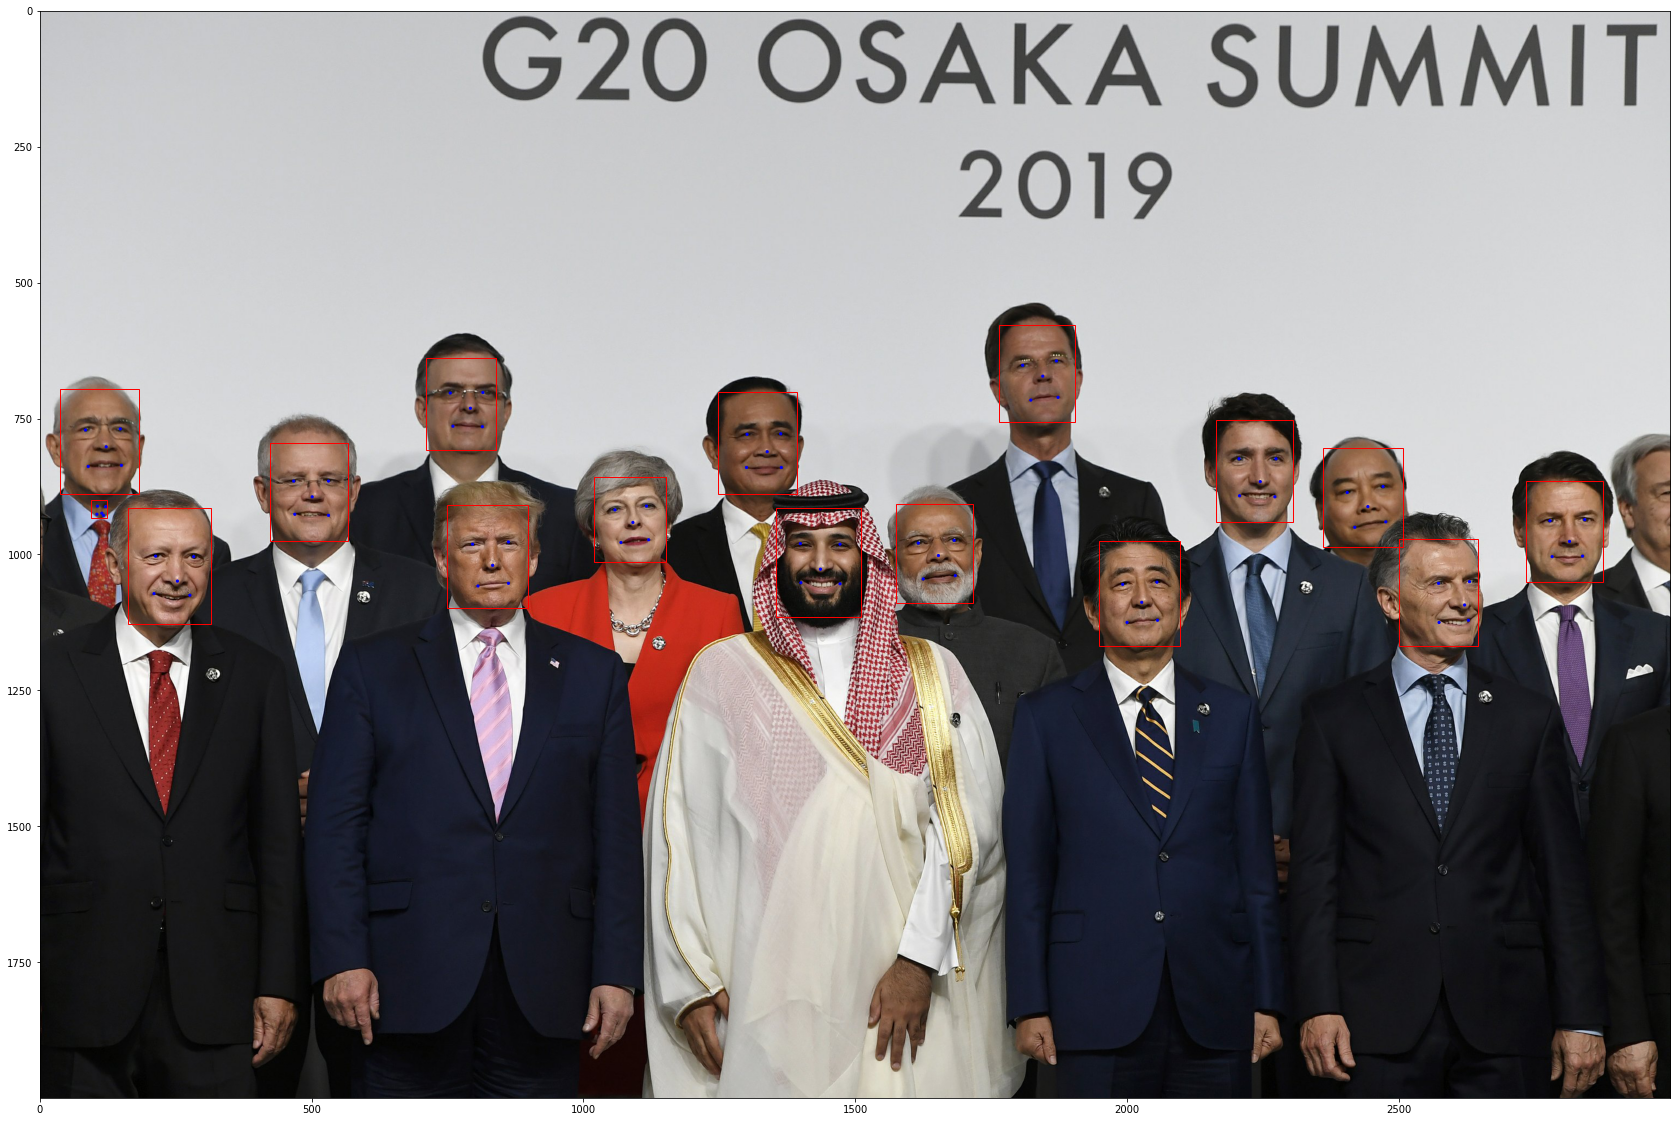

In [ ]:
pyplot.figure(figsize=(30,20))
draw_image_with_boxes(filename, faces)

In [ ]:
from PIL import Image
from deepface import DeepFace
verification_Image_File = "Modi_Image.jpg"
verification_Image = pyplot.imread(verification_Image_File)

# draw each face separately
def draw_faces(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot each face as a subplot
  for i in range(len(result_list)):
    # get coordinates
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    # define subplot
    pyplot.subplot(1, len(result_list), i+1)
    pyplot.axis('off')
    # plot face
    if(x1<0): x1 = 0;
    if(x2<0): x2 = 0;
    if(y1<0): y1 = 0;
    if(y2<0): y2 = 0;
    pyplot.imshow(data[y1:y2, x1:x2])
    im = Image.fromarray(data[y1:y2, x1:x2])
    im.save('test.jpg')
    result = DeepFace.verify(verification_Image_File, 'test.jpg', model_name= 'Facenet', enforce_detection=False)
    print(result)
    if(result != []):
      if(result['verified'] ==True):
        pyplot.title('This is Modi')
      else:
        pyplot.title('This is not Modi')
    # show the plot
  pyplot.show()

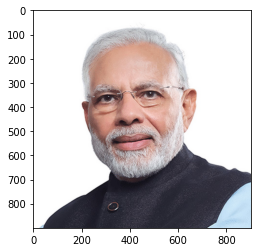

In [ ]:
data = pyplot.imread(verification_Image_File)
pyplot.imshow(data)

Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 0.7764655202627182, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 0.9243012368679047, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 1.1947159320116043, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 0.9142085090279579, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 0.6527711749076843, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 1.2134174704551697, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 0.9518264159560204, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 1.040412213653326, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 1.0347530916333199, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 0.7828667014837265, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:05<?, ?it/s]


{'verified': False, 'distance': 1.1192792803049088, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 1.1051326990127563, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': True, 'distance': 0.23561370372772217, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 1.0081740757450461, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 1.1463637799024582, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}
Using Facenet model backend cosine distance.


Verification:   0%|          | 0/1 [00:04<?, ?it/s]


{'verified': False, 'distance': 0.8581510782241821, 'max_threshold_to_verify': 0.4, 'model': 'Facenet', 'similarity_metric': 'cosine'}


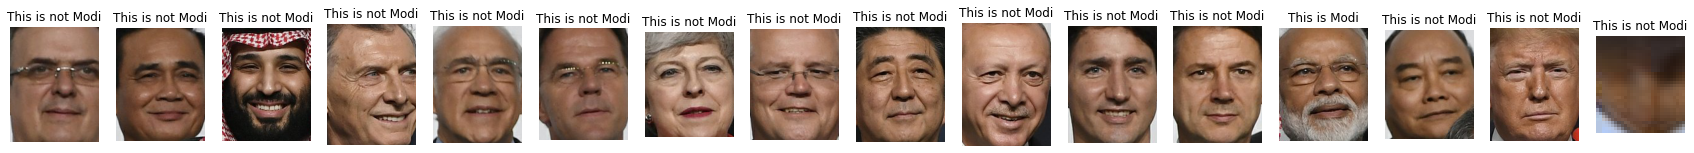

In [ ]:
pyplot.figure(figsize=(30,3))
draw_faces(filename, faces)

In [ ]:
demography = DeepFace.analyze(verification_Image_File)

Actions to do:  ['emotion', 'age', 'gender', 'race']


Analyzing:   0%|          | 0/1 [00:02<?, ?it/s]


In [ ]:
print("Age: ", demography["age"])
print("Gender: ", demography["gender"])
print("Emotion: ", demography["dominant_emotion"])
print("Race: ", demography["dominant_race"])

Age:  45.644541048743015
Gender:  Man
Emotion:  angry
Race:  middle eastern


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import io

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return Image.open(f)

In [ ]:
from IPython.display import clear_output
import PIL;
import time;
import numpy as np

original_image = np.array(take_photo())

<IPython.core.display.Javascript object>

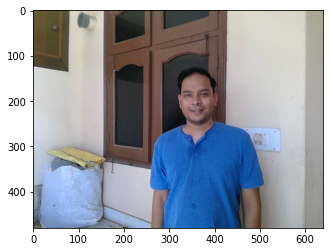

In [ ]:
pyplot.imshow(original_image)

In [ ]:
im = Image.fromarray(original_image)
im.save('test.jpg')

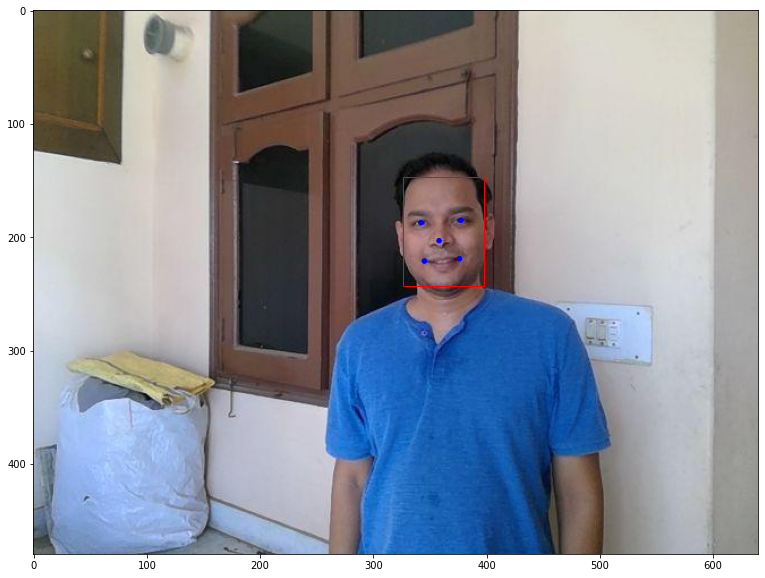

In [ ]:
filename = "test.jpg"
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
pyplot.figure(figsize=(20,10))
draw_image_with_boxes(filename, faces)

In [ ]:
demography = DeepFace.analyze('test.jpg')

Actions to do:  ['emotion', 'age', 'gender', 'race']




Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]


Finding actions:   0%|          | 0/4 [00:00<?, ?it/s]


Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]


Action: emotion:  25%|██▌       | 1/4 [00:00<00:00,  3.68it/s]


Action: age:  25%|██▌       | 1/4 [00:00<00:00,  3.68it/s]    


Action: age:  50%|█████     | 2/4 [00:01<00:00,  2.24it/s]


Action: gender:  50%|█████     | 2/4 [00:01<00:00,  2.24it/s]


Action: gender:  75%|███████▌  | 3/4 [00:01<00:00,  1.89it/s]


Action: race:  75%|███████▌  | 3/4 [00:01<00:00,  1.89it/s]  


Analyzing:   0%|          | 0/1 [00:02<?, ?it/s]


In [ ]:
demography

{'age': 33.24514535726258,
 'dominant_emotion': 'happy',
 'dominant_race': 'latino hispanic',
 'emotion': {'angry': 6.69633101693057e-05,
  'disgust': 2.565469996937814e-10,
  'fear': 1.5299844129637454e-07,
  'happy': 98.00502026170855,
  'neutral': 1.993182471665586,
  'sad': 0.0014555382096391044,
  'surprise': 0.0002787733636151401},
 'gender': 'Man',
 'race': {'asian': 14.343802630901337,
  'black': 6.993540376424789,
  'indian': 16.511733829975128,
  'latino hispanic': 38.13202679157257,
  'middle eastern': 10.810820758342743,
  'white': 13.208074867725372}}

In [ ]:
print("Age: ", demography["age"])
print("Gender: ", demography["gender"])
print("Emotion: ", demography["dominant_emotion"])
print("Race: ", demography["dominant_race"])

Age:  33.24514535726258
Gender:  Man
Emotion:  happy
Race:  latino hispanic
